# COGS 108 - Final Project 

# Overview

Our team set out to find which specific features in the show *Game of Thrones* contribute the most to episode ratings. We analyzed plot features along with the writers and directors of each episode using feature importance models from RandomForest and XGBoost. We found that character prescence and episode sentiment are the most postively influential features contributing to episode rating.

# Names

- Jared Andrews 
- Pedro Enciso
- Sieng Ly
- Erik Mumm

# Research Question

Are there underlying attributes of Game of Thrones episodes that can be used to predict the audience rating of that episode? 

## Background and Prior Work

Game of Thrones is a television show that has aired on HBO for eight seasons and it’s arguably the most popular show of all time, with millions of viewers around the world tuning in to view each of its eight seasons. According to IMDb, an online database of information related to movies and tv shows, Game of Thrones is currently rated at 9.3 out of 10 overall (1). However, some seasons and episodes are rated higher or lower than the others. So, what attributes lead an episode to being more or less highly rated? 

This question is of interest to our group because we are all fans of Game of Thrones and we are curious to see what factors play a role in the critics mind when rating an episode. Game of Thrones has aired its final episode in 2019 and the responses from the critics were shocking. According to Rotten Tomatoes, a movies and tv review website, the last Episode of Season 8, “The Iron Throne”, received the lowest rating (48%) in the history of the show (2).


Having watched the whole Game of Thrones series and reviewed the viewer ratings of each show, we noticed the highest rated episodes all included a major battle. The episodes “Battle of the Bastards,” “Hardhome,” “The Winds of Westeros,” and “The Rains of Castamere” each contained a major battle or act of violence between two groups of significant characters. These episodes are also the highest rated episodes of the series, all receiving a 9.9 rating (2).
 
This research is important because it can shed light on the variables within a script that have an affect on the viewer ratings of the show or movie. Future script writers and directors can also reference this project to maximize the viewer ratings for their project.  
 
There have been many projects done with the Game of Thrones, most likely due to the overwhelming popularity and the massive amount of data stored in the script. For example, Yish Lim conducted an analysis to find the correlation of the screen time of certain characters in the series vs the amount of views of the episodes they appear in. She found that the three characters with the highest correlations were Grey Worm (0.9038), Missandei (0.888) and Tormund Giantsbane (0.8864) (3). These findings are interesting because these characters are mainly involved in violence and play supporting roles within the series. 
 
Another interesting study analyzes the popularity of each major character using votes from Winteriscoming.net’s Throne Madness where fans of the show can vote for their favorite character in a bracket style competition. Although this project does not handle the script of the show, it gives us a good idea of who the viewers' favorite characters are, which may have an influence on the ratings of the episodes they appear in. This project found that the character who won the most votes overall was Jon Snow, and the character who won the most average votes (average of each round they appear in) was Davos Seaworth (4).



References (include links):
- 1) https://www.imdb.com/title/tt0944947/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=12230b0e-0e00-43ed-9e59-8d5353703cce&pf_rd_r=R4EKGB7W14R2850YVCJ3&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=toptv&ref_=chttvtp_tt_9
- 2) https://www.rottentomatoes.com/tv/game_of_thrones/s08
- 3) https://medium.com/@yishuen/data-science-in-westeros-a784a624ba80
- 4) https://www.freecodecamp.org/news/how-i-used-python-to-analyze-game-of-thrones-503a96028ce6/

# Hypothesis


Our hypothesis is that the appearance of certain characters, the amount of violence in the episode, and the number of words in the episode's script are important factors that influence the episode's rating.

# Datasets

To create our final dataset, our group used a combination of preexisiting datasets, which formed the basis of our final dataset, data extracted via web scraping. The three preprocessed datasets that we used are as follows:

1) <b>Episode Ratings Dataset</b>
- Link to dataset: https://www.ratingraph.com/tv-shows/game-of-thrones-ratings-26649/#ratings
- Number of observations: 73  

The episode ratings dataset contains the title, release year, and average audience rating for each of the 73 Game of Thrones episodes. For our final dataset we kept the season number, episode number and average audience ratings for each episode.  
  
2) <b> Scripts Dataset </b>
- Link to dataset: https://www.kaggle.com/albenft/game-of-thrones-script-all-seasons
- Number of observations: 23911   

Each observation in the scripts dataset corresponds to a spoken line in the Game of Thrones. Each observation has the following features: the text of the spoken line, the character who said the line and the release date, season number, episode number and episode title of the episode the line was spoken in. 

3) <b> Deaths Dataset </b>
- Link to dataset: https://github.com/washingtonpost/data-game-of-thrones-deaths
- Number of observations: 6887 

Each obsercation in the deaths dataset corresponds to a character death in the Game of Thrones. Each observation has the following features: the the episode and season the death occurred, the character killed, the killer, the method of kill, the category of the method of kill, the reason for the kill, the location of the kill, the killer's allegiance and the importance of the kill. 

To combine these datasets, an inner join was performed on the season and episode columns. Since the scripts and deaths datasets were had many observations per episode, new datasets were created by grouping the rows by episode and performing aggregate functions on the grouping to create new features. The the ratings dataset and the two new datasets were joined using the episode and season numbers. Additional features, derived from webscraping, were added to this joined table. This process is described in the *Additional Data Ingestion and Data Cleaning* section.  


The table below details the final dataset used for our analysis:  

| Column                	| Description                                                                                                            	| Data Type         	| Example Value                                       	|
|-----------------------	|------------------------------------------------------------------------------------------------------------------------	|-------------------	|-----------------------------------------------------	|
| <b>plot</b>                  	| Plot summary of episode                                                                                                	| String            	| "On the continent of Westeros, rangers of the N..." 	|
| <b>script</b>                	| Episode Script                                                                                                         	| String            	| "What do you expect? They're savages. One lot..."   	|
| <b>writers</b>               	| List of episode writers                                                                                                	| List (of strings) 	| ['David Benioff', 'D. B. Weiss']                    	|
| <b>directors<b/>             	| List of episode directors                                                                                              	| List (of strings) 	| ['Miguel Sapochnik']                                	|
| <b>script_num_words<b/>      	| Number of words in the script                                                                                          	| Int               	| 3403                                                	|
| <b>number_of_profanities</b> 	| Number of profanities in script                                                                                        	| Int               	| 11                                                  	|
| <b>characters_most_lines</b> 	| List of five characters with most lines in script                                                                      	| List (of string)  	| ['Eddard Stark' 'Jon Snow' 'Arya Stark',...]        	|
| <b>top_tfidf_words</b>       	| List of ten words from script with highest TFIDF                                                                       	| List (of string)  	| ['tyrant', 'liberated', 'freed',..]                 	|
| <b>ep_sentiment</b>          	| Sentiment of episode (1 = positive, 0 = neutral, -1 = negative)                                                        	| Int               	| 1                                                   	|
| <b>number_deaths</b>         	| Number of deaths in episode                                                                                            	| Int               	| 17                                                  	|
| <b>avg_death_importance</b>  	| Average importance of the deaths that occurred in the episode (character's importance rated from 1-4)                  	| Float             	| 2.333333                                            	|
| <b>num_main_char_deaths</b>       	| Number of main characters killed in the episode (main character classified as those having an importance value of 4) 	| Int     	| 5                                                   	|
| <b>common_method_kill</b>    	| Most common method used to kill a character in the episode                                                             	| String            	| 'Blade'                                             	|
| <b>num_love_scenes</b>     	| Number of love scenes in the episode                                                                                   	| Int               	| 4                                                   	|
| <b>rating</b>                	| Average audience rating for the episode                                                                                	| Float             	| 9.1                                                 	|

# Setup

In [0]:
import warnings
warnings.filterwarnings("ignore")

# Library installations
!pip install profanity_check
!pip install wikipedia
!pip install word2number
!pip install vaderSentiment
!pip install git+https://git@github.com/kavgan/word_cloud.git
!pip install treeinterpreter

# Manipulation and analysis of data
import pandas as pd
import numpy as np
# Used for getting list of punctuations to remove
import string
# Common words to remove from script 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Function to determine if word is a profanity
from profanity_check import predict
# Wikipedia API to scrape Wikipedia pages
import wikipedia
# Regular expression for webscraping
import re
# Library to get website HTML
import requests
# Parsing HTML documents
from bs4 import BeautifulSoup
# Convert numbers from string to int
from word2number import w2n
# TFIDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer
# Sentiment Analysis - if an episode is positive or negative
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Create word cloud 
from word_cloud.word_cloud_generator import WordCloud
# Display raw HTML
from IPython.core.display import HTML
# Import Reuters corpus
from nltk.corpus import reuters
#import tools necessary to create simple charts/graphs
import matplotlib.pyplot as plt
plt.rcdefaults()
#import seasborn to create heatmap 
import seaborn as sns
#Import RandomForestRegressor to do feature importances
from sklearn.ensemble import RandomForestRegressor
#Import treeinterpreter to find positive/negative contributions
from treeinterpreter import treeinterpreter as ti
#Import XGBoost for Feature Importance
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
# Set Default plot size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)
# For Plotting images
from skimage import io

## Additional Data Ingestion and Data Cleaning

The final dataset was created by supplementing the joined dataset, mentioned in the *Datasets* section, with additional features extracted through web-scraping. A description of this process, along with the necessary code, is detailed below. Note that data cleaning was performed simultaneously while creating our final dataset (indicated by comments in code). 


**Load Datasets**

In [0]:
#Load in Episode Ratings dataset
episodes_ratings_url = 'https://raw.githubusercontent.com/jaredandrews99/COGS_108_Project_Data/master/Data/Raw/Game_of_Thrones_Ratings.csv'
episodes_ratings = pd.read_csv(episodes_ratings_url,index_col=[0,1])

# Load in Scripts dataset
script_url = 'https://raw.githubusercontent.com/jaredandrews99/COGS_108_Project_Data/master/Data/Raw/Game_of_Thrones_Script.csv'
scripts = pd.read_csv(script_url)

# Load in Deaths dataset
deaths_url = 'https://raw.githubusercontent.com/washingtonpost/data-game-of-thrones-deaths/master/game-of-thrones-deaths-data.csv'
deaths = pd.read_csv(deaths_url)

**Add episode scripts to the Episode Ratings dataset.**

In [0]:
# Format Season/Episode columns in Scripts Dataset as ints
scripts['Season'] = scripts['Season'].apply(lambda x: int(x.split()[1]))
scripts['Episode'] = scripts['Episode'].apply(lambda x: int(x.split()[1]))

# Create script of each episode
episodes_ratings['script'] = scripts.groupby(['Season','Episode'])['Sentence'].apply(' '.join).values

**Create the following features from the Deaths dataset for each episode**:    

1) Number of Deaths  
2) Average Importance of Deaths  
3) Main Character Death  
4) Most Common Method of Kill  
For episodes with no deaths, the number of deaths, average importance of deaths and main character death features were set to 0. The most common method of kill feature was set to NaN. 

Merge Rating Episode and Deaths datasets to form final dataset.

In [0]:
# Get the number of deaths and average importance of deaths per episode
deaths_ep = deaths.groupby(['season','episode'])['character_killed','importance'].agg(['count','mean'])['importance']
deaths_ep.columns = ['number_deaths','avg_death_importance']

# Create feature that specifies the number of important character deaths in a episode
important_deaths = deaths[deaths['importance'] == 4].groupby(['season','episode'])[['importance']].count()
important_deaths.rename({'importance':'num_main_char_deaths'},axis=1,inplace=True)
deaths_ep = deaths_ep.merge(important_deaths,how='left',left_index=True,right_index=True)

# Create feature that specifies the most commonly used method of kill
weapon_counts = deaths.groupby(['season','episode'])['method_cat'].value_counts()
season, episode, methods = -1, -1, []
for (s,ep,m), count in weapon_counts.iteritems():
    if (season != s) or (episode != ep):
        methods.append(m)
        season , episode = s, ep
deaths_ep['common_method_kill'] = methods
deaths_ep.index.names = ['Season','Episode']

# Combined Death and Episode Ratings features to form final df
final_df = episodes_ratings.merge(deaths_ep,how='left',left_index=True,right_index=True).fillna({'number_deaths':0,'num_main_char_deaths':0,'avg_death_importance':0})

**Creating the number of words per script feature.**

In [0]:
# Get number of words per episode
final_df['script_num_words'] = final_df['script'].apply(lambda script: len([word for word in script.split(' ') if word != '…']))

**Performing a Sentiment Analysis of each episode by classifying each episode as positive, neutral or negative.**

In [0]:
# Get the sentiment of each episode (1 = positive, 0 = neutral, -1 = negative)
ep_sentiment = []
analyzer = SentimentIntensityAnalyzer()
for num, script in final_df['script'].iteritems():
    vsc = analyzer.polarity_scores(script)['compound']
    # map polarity score to a positive, neutral, or negative value; thresholds specified on https://github.com/cjhutto/vaderSentiment
    sent = 1 if vsc >= 0.05 else (0 if vsc >= -0.05 else -1)
    ep_sentiment.append(sent)
final_df['ep_sentiment'] = ep_sentiment

**Perform TFIDF on the scripts of each episode to find the top 10 words that best characterize each episode.**

In [0]:
# Get common words to remove for TFIDF (from https://gist.github.com/deekayen/4148741)
common_words = list(pd.read_csv('https://raw.githubusercontent.com/jaredandrews99/COGS_108_Project_Data/master/Data/Raw/common_words.csv')['words'])

# List of non-sense words or Pronouns that another variation of had already showed up in the top 10 words for the episode
nonsense_unnecessary_words = ['saan','lf','ls','lt','wa','crakehall','sarsfield','stokeworth','alright','ragman','khaleen','daario',
                  'loraq','jaqen','mo','mm','hey','didn','ll','going']

# combine common words and nonsense_unnecessary words to form our remove words list
remove_words = common_words + nonsense_unnecessary_words

# Mapping nicknames or partial names to Character full names (e.g., "dany" -> "Daenerys Targaryen"); created by our group by researching Game of Thrones
got_word_map = pd.read_json('https://raw.githubusercontent.com/jaredandrews99/COGS_108_Project_Data/master/Data/Raw/got_word_map.json',typ='dict').to_dict()

# Perform TFIDF on script
vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
tfidf_matrix = vectorizer.fit_transform(final_df['script'])
feature_names = vectorizer.get_feature_names()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
# Create df with the TDIDF values of each word for each episode
got_tfidf_df = pd.DataFrame(denselist, columns=feature_names, index=final_df.index)
top_words_eps = []
# Iterate through the TFIDF values of each 
for ep,word_list in got_tfidf_df.iterrows():
    words = word_list.sort_values(ascending = False).index.tolist()
    top_10_words = []
    for word in words:
        if len(top_10_words) == 10:
            break
        # if word is a number, in the remove words list or already in the top 10 words don't consider it an important word
        elif (word.isnumeric()) or (word in remove_words) or (word in top_10_words):
            continue
        else:
            if word in got_word_map.keys():
              # If the mappping of the word is already in the top 10 words, don't add it 
                if got_word_map[word] in top_10_words:
                    continue
                top_10_words.append(got_word_map[word])
            else:
                top_10_words.append(word)
    top_words_eps.append(top_10_words)
final_df['top_tfidf_words'] = top_words_eps

**Get the number of profanities spoken per episode.**

In [0]:
profanity_counts = []
# Iterate through each episode script
for num,script in final_df['script'].iteritems():
    
    # Tokenize words
    words = [word for word in script.split(' ') if word != '…']
    filtered_words = []
    
    # punctuation to strip and common words to remove
    exclude = set(string.punctuation)
    exclude.remove('\'')
    stop_words = stopwords.words('english')
    
    # Filter punctuation out of words and filter out common words
    for word in words:
        w = ''.join(ch for ch in word if ch not in exclude).lower()
        if w not in stop_words:
            filtered_words.append(w)
    
    # Create counts for each word
    word_counts = {}
    profanity_count = 0
    for word in set(filtered_words):
        word_counts[word] = filtered_words.count(word)
        # if word is a profanity, increase the profanity count
        if predict([word]):
            profanity_count += word_counts[word]
    profanity_counts.append(profanity_count)
        
final_df['number_of_profanities'] = profanity_counts

Get the five characters who spoke most during each episode.

In [0]:
most_lines = []
# For each episode, get the value counts the feature that specifies who said each line
# Based on the value counts, take five characters who spoke the most
for s,e in scripts.groupby(['Season','Episode']).size().index:
    ep_script = scripts[(scripts.Season == s) & (scripts.Episode == e)]
    characters = ep_script.Name.value_counts().head(5).index.values
    most_lines.append([c.title() for c in characters])
final_df['characters_most_lines'] = most_lines

**Extract the plot summary, directors and writers from Wikipedia.**


In [0]:
eps = scripts['Episode Title'].unique()
plots = []
directors = []
writers = []

# Iterate through each Game of Thrones episode
for ep in eps:

    # Format the episode title so that is coincides with the episode's Wikipedia Page title
    # Use the Wikipedia library to scrape plots, directors and writers from Wikipedia  
    try:
        if ep in ['Mockingbird','High Sparrow','Home','The Winds of Winter','A Knight of the Seven Kingdoms']:
            raise Exception('incorrect_page') 
        elif ep == 'The Queen’s Justice':
            ep = 'The Queen\'s Justice'
        elif ep == 'Winterfell':
            ep = ep + ' (Game of Thrones episode)'
        ep_ = wikipedia.WikipediaPage(title = ep)
    except:
        if ep == 'The Spoils Of War':
            ep = 'The Spoils of War'
        new_ep = ep + ' (Game of Thrones)'
        ep_ = wikipedia.WikipediaPage(title = new_ep)
    
    # From the HTML extract the cleaned plot text
    plot = ep_.content.split('== Plot ==')[1].split('== Production ==')[0]
    cleaned_plot = re.sub('\n\n\n===(.*)===\n','',plot).replace('\n',' ')
    plots.append(cleaned_plot)

    # From the HTML extract the director(s)
    soup = BeautifulSoup(ep_.html(), 'html.parser')
    for director in soup(text='Directed by'):
        dirs = [dir_.text for dir_ in director.parent.parent.find_all('a')]
        directors.append(dirs)

    # From the HTML extract the writer(s)  
    writer_elements = soup(text='Written by')
    if not writer_elements:
        writer_elements = soup(text='Story by')
    for writer in writer_elements:
        wrs = [wr.text for wr in writer.parent.parent.find_all('a')]
        writers.append(wrs)

writers[-1] = ['David Benioff', 'D. B. Weiss']

final_df['plot'] = plots
final_df['writers'] = writers
final_df['directors'] = directors

**Extract the number of love scenes per episode from a GQ article.**

In [0]:
love_scenes_url = 'https://www.gq.com/story/game-of-thrones-nude-scenes-ranked-by-relevance'
# Use Beautiful soup to extract the episode each love scene was from
page = requests.get(love_scenes_url)
soup = BeautifulSoup(page.content)
s_ep = [re.search('\((.*)\)',scene).group(1).split(')')[0].split(',') if re.search('\((Season (.*))\)',scene) else 1 for scene in str(soup).split('\\\\')]

# Convert the messy HTML to list of episodes that the love scene ws from
love_scenes_eps = []
for ep in s_ep:
    if ep == 1:
        continue
    if len(ep)!= 2:
        continue
    else:
        love_scenes_eps.append((ep[0].split(' ')[1],ep[1].split(' ')[2]))

# Create a dictionary with the counts of love scenes per episode
scenes_dict = {}
for ep in love_scenes_eps:
    key_ = '_'.join(ep)
    if key_ not in scenes_dict.keys():
        scenes_dict[key_] = 1
    else:
        scenes_dict[key_] += 1


final_df['num_love_scenes'] = 0
# Add number of love scenes to final df
for ep, val in scenes_dict.items():
    # Split season_episode pairing to get season and episode as an int
    season, ep_ = ep.split('_')
    s,e = w2n.word_to_num(season), w2n.word_to_num(ep_)
    row_ = final_df.loc[s,e].values
    row_[-1] = int(val / 2)
    final_df.loc[s,e] = row_

**Rename the column names and index names so that they are all lowercase. Rearrange columns.**

In [0]:
final_df.columns  = [c.lower() for c in final_df.columns]
final_df.index.names = ['season','episode']
final_df = final_df[['plot','script','writers','directors','script_num_words','number_of_profanities','characters_most_lines',
                     'top_tfidf_words','ep_sentiment','number_deaths','avg_death_importance','num_main_char_deaths','common_method_kill',
                     'num_love_scenes','rating']]


The top five rows of the final dataset are displayed below:

In [0]:
final_df.head()

plot  ... rating
season episode                                                     ...       
1      1        On the continent of Westeros, rangers of the N...  ...    9.1
       2        En route to Vaes Dothrak with Khal Drogo's kha...  ...    8.8
       3        Daenerys gains confidence and earns the respec...  ...    8.7
       4        Ned quietly inquires into the death of Jon Arr...  ...    8.8
       5        Lady Catelyn Stark leads her entourage east th...  ...    9.1

[5 rows x 15 columns]

As seen below, the only column that contains null values is the *common_method_kills* column. This feature is null when the *number_deaths* column is 0, meaning the episode did not have any kills. As a result, the *common_method_kills* is not applicable, and thus set to null.  

In [0]:
null_rows = final_df[final_df.isnull().any(axis=1)]
null_rows

,,plot,script,writers,directors,script_num_words,number_of_profanities,characters_most_lines,top_tfidf_words,ep_sentiment,number_deaths,avg_death_importance,num_main_char_deaths,common_method_kill,num_love_scenes,rating
season,episode,,,,,,,,,,,,,,,
1,3,Daenerys gains confidence and earns the respec...,"Welcome, Lord Stark. Grand Maester Pycelle has...","[David Benioff, D. B. Weiss]",[Brian Kirk],4907,10,"[Eddard Stark, Tyrion Lannister, Petyr Baelish...","[ducks, favorites, eaten, blessing, forgetful,...",1,0.0,0.0,0.0,NaN,2,8.7
2,8,Tyrion and Bronn plan the defense of King's La...,"Riders approaching! Open the gate! Why, it's t...","[David Benioff, D. B. Weiss]",[Alan Taylor],5361,21,"[Tyrion Lannister, Robb Stark, Arya Stark, Tal...","[River Rhoyne, bridge, thievery, charwomen, ov...",1,0.0,0.0,0.0,NaN,1,8.8
3,7,"Sansa is comforted by Margaery, who has heard ...","How far are we? About a week, I think. You thi...",[George R. R. Martin],[Michelle MacLaren],4753,18,"[Jaime Lannister, Ygritte, Jon Snow, Tyrion La...","[banging, windmill, Bruni, The Yellow City, dr...",1,0.0,0.0,0.0,NaN,2,8.7
8,2,Daenerys and Sansa both contemplate the fate ...,"When I was a child, my brother would tell me a...",[Bryan Cogman],[David Nutter],4015,11,"[Jaime Lannister, Tyrion Lannister, Daenerys T...","[crypt, spun, fabled, milord, fooled, survived...",1,0.0,0.0,0.0,NaN,1,7.9


# Data Analysis & Results

### **Exploratory Data Analysis**

For the exploratory data analysis section, the project team broke down each dataset to the selected variables. Each variable was analyzed at a high level to understand basic relationships between variables and identify outliers or trends.

To complete the high-level trends analysis for all 8 seasons, much of the EDA was conducted aggregated by season for simplicity. Features were modeled for importance based on episode rating deeper within the analysis. 

As noted above, the following shows the dataset our project team analyzed for this project:

| Column                	| Description                                                                                                            	| Data Type         	| Example Value                                       	|
|-----------------------	|------------------------------------------------------------------------------------------------------------------------	|-------------------	|-----------------------------------------------------	|
| <b>plot</b>                  	| Plot summary of episode                                                                                                	| String            	| "On the continent of Westeros, rangers of the N..." 	|
| <b>script</b>                	| Episode Script                                                                                                         	| String            	| "What do you expect? They're savages. One lot..."   	|
| <b>writers</b>               	| List of episode writers                                                                                                	| List (of strings) 	| ['David Benioff', 'D. B. Weiss']                    	|
| <b>directors<b/>             	| List of episode directors                                                                                              	| List (of strings) 	| ['Miguel Sapochnik']                                	|
| <b>script_num_words<b/>      	| Number of words in the script                                                                                          	| Int               	| 3403                                                	|
| <b>number_of_profanities</b> 	| Number of profanities in script                                                                                        	| Int               	| 11                                                  	|
| <b>characters_most_lines</b> 	| List of five characters with most lines in script                                                                      	| List (of string)  	| ['Eddard Stark' 'Jon Snow' 'Arya Stark',...]        	|
| <b>top_tfidf_words</b>       	| List of ten words from script with highest TFIDF                                                                       	| List (of string)  	| ['tyrant', 'liberated', 'freed',..]                 	|
| <b>ep_sentiment</b>          	| Sentiment of episode (1 = positive, 0 = neutral, -1 = negative)                                                        	| Int               	| 1                                                   	|
| <b>number_deaths</b>         	| Number of deaths in episode                                                                                            	| Int               	| 17                                                  	|
| <b>avg_death_importance</b>  	| Average importance of the deaths that occurred in the episode (character's importance rated from 1-4)                  	| Float             	| 2.333333                                            	|
| <b>num_main_char_deaths</b>       	| Number of main characters killed in the episode (main character classified as those having an importance value of 4) 	| Int     	| 5                                                   	|
| <b>common_method_kill</b>    	| Most common method used to kill a character in the episode                                                             	| String            	| 'Blade'                                             	|
| <b>num_love_scenes</b>     	| Number of love scenes in the episode                                                                                   	| Int               	| 4                                                   	|
| <b>rating</b>                	| Average audience rating for the episode                                                                                	| Float             	| 9.1                                                 	|

In [0]:
#First, let's bring in the final_df created above in our "Data Ingestion and Data Cleaning" Section
eda_df = pd.read_csv("https://raw.githubusercontent.com/jaredandrews99/COGS_108_Project_Data/master/Data/Processed/game_of_thrones_cleaned.csv")

#CSVs save lists as string; convert string back to list
list_cols = ['writers','directors','top_tfidf_words','characters_most_lines']
for col in list_cols:
  eda_df[col] = eda_df[col].apply(lambda val: re.findall(r"'(.*?)'", val, re.DOTALL))


### Ratings

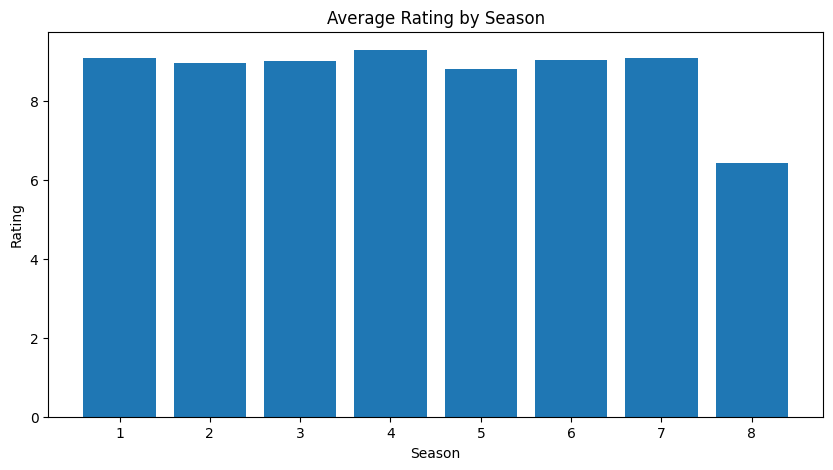

In [0]:
#create a simple bar chart of ratings, aggregated by each season
ratings = pd.DataFrame(eda_df.groupby('season').mean()['rating'])

x_axis = list(ratings.index.values)
y_axis = ratings['rating']

plt.bar(x_axis, y_axis)
plt.title('Average Rating by Season')
plt.xlabel('Season')
plt.ylabel('Rating')

plt.show()

Within our EDA of ratings, it is clear that Season 8's ratings are reflective of the overall "negative hype" the final season recieved from the general public. The episodes of Season 8 represent a distinct **outlier** among ratings. This anger was showcased throughout the internet and on social media. 

### Number of Words in the Script


In this section of the EDA, we will compare the number of words per episode with the rating of the episode and try to identify basic correlation. 

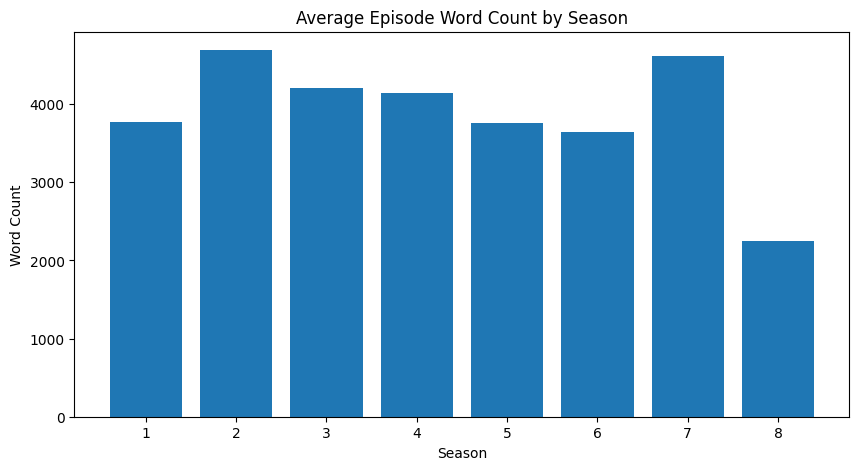

In [0]:
#first, let's look at the average number of words per season and compare with the ratings by season (as seen above)
#we will create a similar bar chart to the bar chart above
num_words = pd.DataFrame(eda_df.groupby('season').mean()['script_num_words'])

x_axis = list(num_words.index.values)
y_axis = num_words['script_num_words']

plt.bar(x_axis, y_axis)
plt.title('Average Episode Word Count by Season')
plt.xlabel('Season')
plt.ylabel('Word Count')

plt.show()


Suprisingly, we can quickly identify a major correlation between the average number of words in each episode and the average rating of each episode - Season 8 is once again the outlier, average just over 2000 words per episode, with the other seasons coming in over 3500 per episode. This is a correlation our project can explore further.

### Sentiment Analysis

Sentiment analysis is a form of natural language processing which helps the analyst understand the emotion of a certain body of text. Our team performed this analysis on the script of each episode. 

To explore the sentiment of different episodes, this EDA will summarize sentiments of seasons and compare to the ratings of each season analyzed above. 

It is important to note that sentiment can be negative. In our analysis, we assigned a value of + 1 to episodes with an overall positive sentiment, and - 1 to episodes wiht an overall negative sentiment. 

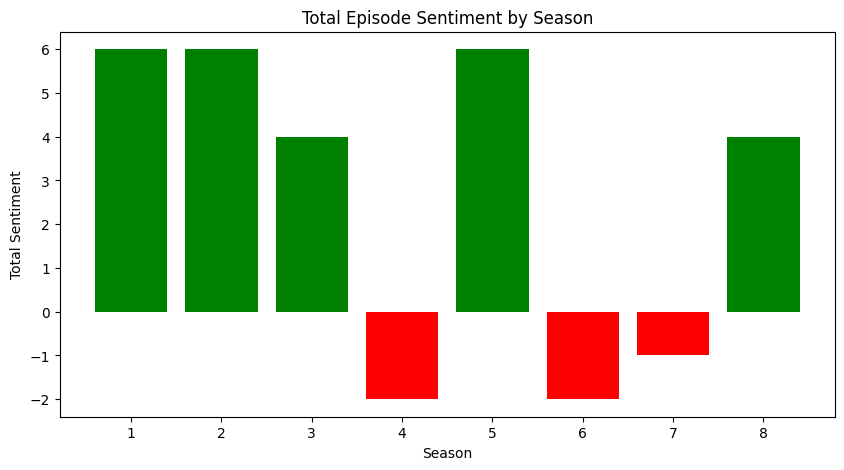

In [0]:
#let's look at the total sentiment per season and compare with the ratings by season (as seen above)
sentiment_total = pd.DataFrame(eda_df.groupby('season').sum()['ep_sentiment'])

x_axis = list(sentiment_total.index.values)
y_axis = sentiment_total['ep_sentiment']

plt.bar(x_axis, y_axis,color='gggrgrrg')
plt.title('Total Episode Sentiment by Season')
plt.xlabel('Season')
plt.ylabel('Total Sentiment')

plt.show()

With an initial pass-through, it does not appear that Total Episode Sentiment correlates with Ratings. One interesting observation is that Season 4, the highest rated season, is actually tied for the lowest overall sentiment. This would not support the conjecture that an overall postive sentiment is beneficial for episode rating. 

### TF_IDF Words - Wordclouds

TF_IDF is a common analysis to determine the importance of a single word within a large text (in our case, a script). To explore the results of our TF_IDF analysis, our EDA contains a series of wordclouds, representing the top 25 words in each season, as valued by TF_IDF.

In [0]:
# to use the code below, we need a list with corresponding weights - how can i extract from:
got_tfidf_df.index.names = ['Season','Episode']
season_tfidf = got_tfidf_df.groupby('Season').sum()

#clean the word data by making lowercase and removing numbers
filtered_tfidf = pd.DataFrame()
for w, tfidfs in season_tfidf.iteritems():
  word = w.lower()
  if (word not in remove_words) and (word.isalpha()):
      if word in got_word_map.keys():
        word = got_word_map[word]
      filtered_tfidf[word] = tfidfs.values

#create season 1-8 WordCloud
words_list = filtered_tfidf.columns.values
for season in range(8):
  season_tfidfs = filtered_tfidf.iloc[season].values
  words_tfidfs = list(zip(words_list, season_tfidfs))
  sorted_w_tfidfs = sorted(words_tfidfs,key = lambda x : x[1], reverse = True)
  word_cloud_words = sorted_w_tfidfs[:25]
  wc=WordCloud(use_tfidf=True)
  embed_code=wc.get_embed_code(text_scores=pd.DataFrame(word_cloud_words),random_color=True)
  spaces = ' ' * 70
  print(spaces + '\033[1mSeason {} Word Cloud'.format(str(season+1)) + '\033[0m')
  display(HTML(embed_code))
  print('\n\n\n\n')

                                                                      Season 1 Word Cloud







                                                                      Season 2 Word Cloud







                                                                      Season 3 Word Cloud







                                                                      Season 4 Word Cloud







                                                                      Season 5 Word Cloud







                                                                      Season 6 Word Cloud







                                                                      Season 7 Word Cloud







                                                                      Season 8 Word Cloud


### Deaths per Episode

With a complex series that develops such complete and engaging characters, it was important to our research to understand the effects of deaths on ratings throughout the series.

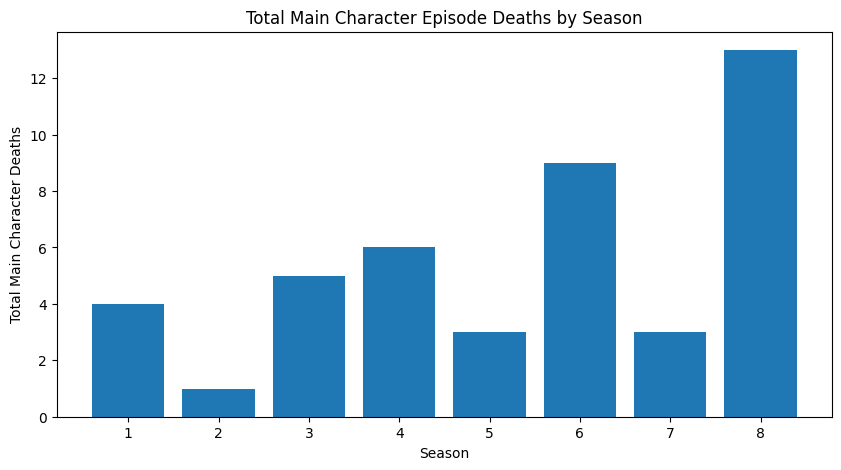

In [0]:
#let's look at the total deaths per season and compare with the ratings by season (as seen above)
deaths_total = pd.DataFrame(eda_df.groupby('season').sum()['num_main_char_deaths'])

x_axis = list(deaths_total.index.values)
y_axis = deaths_total['num_main_char_deaths']

plt.bar(x_axis, y_axis)
plt.title('Total Main Character Episode Deaths by Season')
plt.xlabel('Season')
plt.ylabel('Total Main Character Deaths')

plt.show()

As it is the conclusion of the series, it is understandable that Season 8 contains a significant amount of Main Character Deaths. Unfortunately, this does not seem to have gone well for ratings. 

An interesting counterpoint, however, is the significant number of deaths in season 4 and 6 - two highly rated seasons.

A reasonable conjecture is that it does not seem like the emotional impact of losing main characters is a major component in the assignment of ratings.

### Profanities

The presence or lack thereof of profain language can effect the tone of episodes. We will explore if the number of profanities has any effect on the episode rating. 

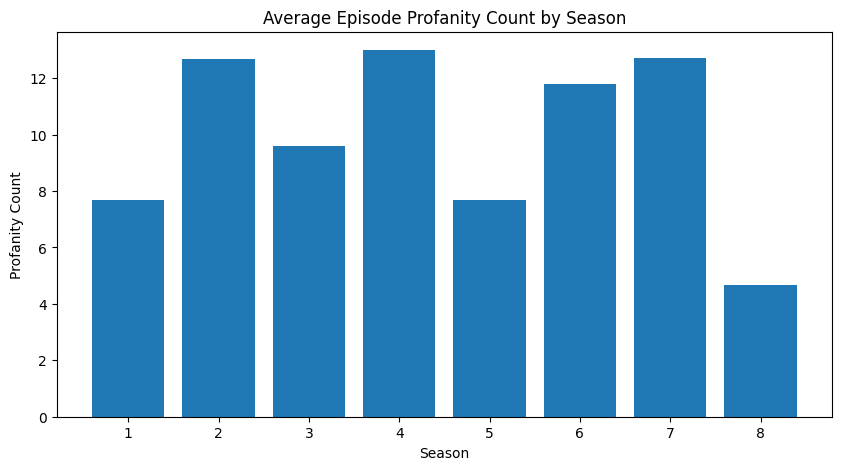

In [0]:
num_fbombs = pd.DataFrame(eda_df.groupby('season').mean()['number_of_profanities'])

x_axis = list(num_words.index.values)
y_axis = num_fbombs['number_of_profanities']

plt.bar(x_axis, y_axis)
plt.title('Average Episode Profanity Count by Season')
plt.xlabel('Season')
plt.ylabel('Profanity Count')

plt.show()


At first glance, it seems like average profanity usage may have a significant impact on rating. It is important to note, however, that these averages may need to be normalized by overall Word Count for accurate conclusions to be drawn. (See Season 8 - very low profanity count, but this season also has the lowest word count)

To fix this issue, we can create a new column of normalized Profanity Counts.

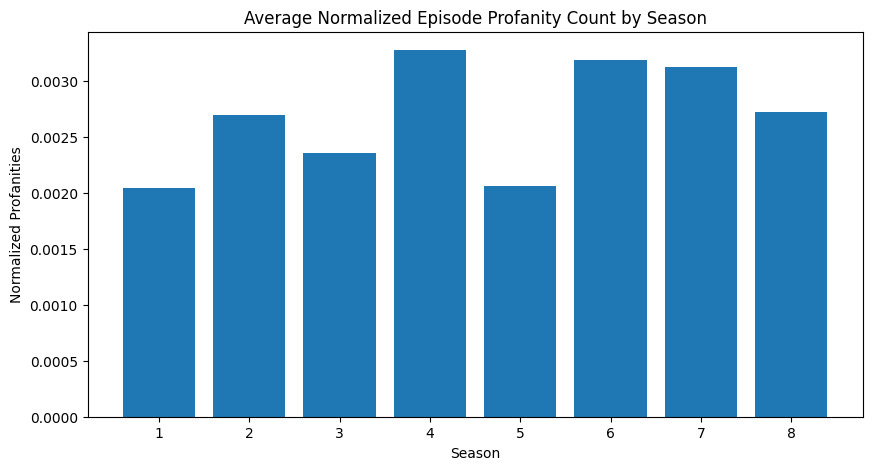

In [0]:
#let's normalize the profanity counts based on word count

eda_df['normalized_profanities'] = eda_df['number_of_profanities']/eda_df['script_num_words']

#now, we can re-create the graph with the normalized profanity averages

num_fbombs_normalized = pd.DataFrame(eda_df.groupby('season').mean()['normalized_profanities'])

x_axis = list(num_words.index.values)
y_axis = num_fbombs_normalized['normalized_profanities']

plt.bar(x_axis, y_axis)
plt.title('Average Normalized Episode Profanity Count by Season')
plt.xlabel('Season')
plt.ylabel('Normalized Profanities')

plt.show()


After normalization, we do gain a more clear picture of potential trends. It does appear that the high profanity count of season 4 may have an impact on the high rating it received. The counterpoint, however, is the low profanity counts in Season 1 and 5, which do not seem to correlate to ratings.

### Love Scenes

Emotional bonds formed between two characters most certainly add to character development and play a part in the outcome of episodes. This EDA will explore potential trends found between Love Scenes and ratings.

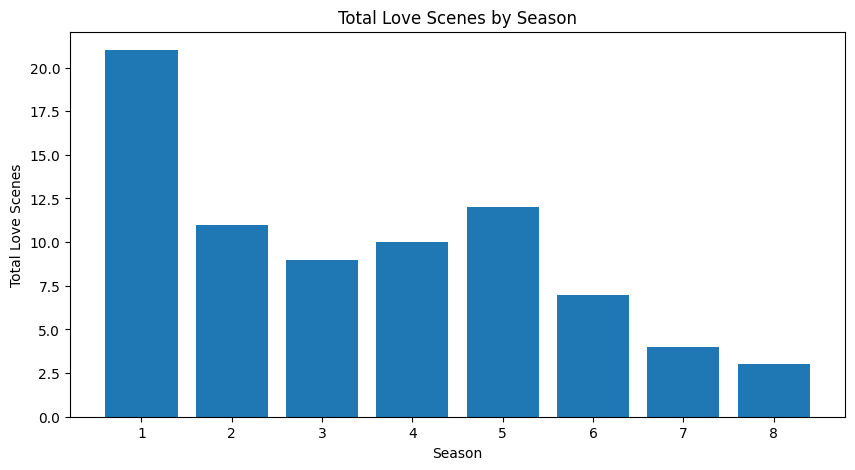

In [0]:
love_total = pd.DataFrame(eda_df.groupby('season').sum()['num_love_scenes'])

x_axis = list(deaths_total.index.values)
y_axis = love_total['num_love_scenes']

plt.bar(x_axis, y_axis)
plt.title('Total Love Scenes by Season')
plt.xlabel('Season')
plt.ylabel('Total Love Scenes')

plt.show()

With the outstanding value in Season 1, it does not appear that Total Love Scenes have a major correlation with ratings of episodes.

### Variable Correlation

Another important thing to understand when exploring data sets is the correlation between variables. One statistical tool we can use for this is the Pearson Correlation. For this EDA, our team has created the following heat map, which clearly designates variable pairings with the associated correlation values. 

1.0 means complete correlation - something only found when a variable is correlated with itself.

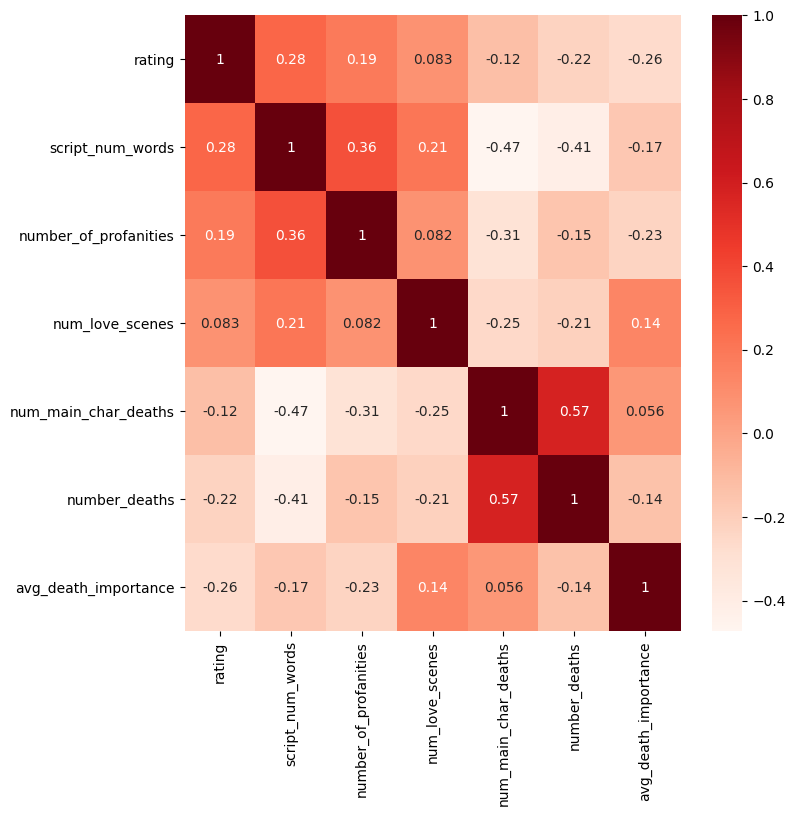

In [0]:
#Using Pearson Correlation
df_corr = eda_df[['rating','script_num_words','number_of_profanities','number_deaths','avg_death_importance','num_main_char_deaths','num_love_scenes']]
plt.figure(figsize=(8,8))
cor = df_corr.corr().sort_values(['rating'],ascending=False)
cor = cor[cor.index]
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Based on the above matrix of correlations, it appears that the number of words in an episode script, the number of deaths, and the average death importance all correlate strongly with Rating. This is supported by our earlier EDA, and is a strong next step towards understanding the feature importance of our dataset.

# Analysis

In [0]:
# Set up dfs for one-hot encoding
ohe_cols = ['writers', 'directors','common_method_kill','characters_most_lines']
drop_cols = ohe_cols + ['season','episode','plot','script','top_tfidf_words']
processed_df = eda_df.drop(drop_cols,axis=1)
ohe_df = eda_df[ohe_cols]

# One-hot encode categorical variables
for col in ohe_cols:
  if col == 'common_method_kill':
    ohe_col_df = ohe_df[col].str.get_dummies()
  else:
    ohe_col_df = ohe_df[col].str.join('|').str.get_dummies()
  ohe_col_df.columns = [x + '_' + col for x in ohe_col_df.columns]
  processed_df = pd.concat([processed_df,ohe_col_df],axis=1)

# X and Y to be fed into model
X = processed_df.drop(['rating'],axis=1)
Y = processed_df['rating']

### Feature Contributions - Random Forest


We used Random Forest, a supervised classification algorithm, to create a model that shows which features have the most impact on an episode rating, also known as Feature Importance. Feature importance refers to techniques that assign a score to input features based on how useful they are at prediction a target variable. 

Random Forest works with a "many trees" strategy, generating random decision trees and calculating each feature's contribution to the overall prediction. Aggregating the "many trees" allows Random Forest to assign feature importance based on aggregated feature contribution to overall prediction. 

For our analysis the target variable (the prediction variable we want to calculate feature contributions to) is the rating of each episode. 

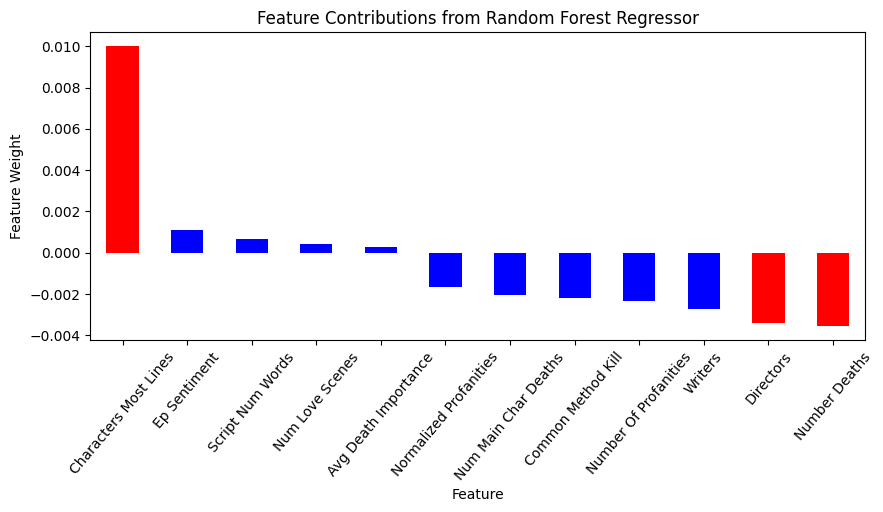

In [0]:
#Buiding the model using RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=0,)
rfr_model.fit(X,Y)

#Use the RF model to get the contributions of each feature
rfr_prediction, rfr_bias, rfr_contributions = ti.predict(rfr_model, X)

#Create a dict containing each feature's contribution to every episode
rfr_feature_dict = dict((k,[]) for k in list(X))
for i in range(len(X)):
    for c, feature in sorted(zip(rfr_contributions[i], list(X)), key=lambda x: -abs(x[0])):
        rfr_feature_dict[feature].append(round(c,2))

#Create a new dict with the mean of each feature's total contributions
rfr_feature_mean_dict = dict((k,[]) for k in list(X))
rfr_key_list = list(feature_dict.keys())
for feature in range(len(X.columns)):
    rfr_feature_mean_dict[rfr_key_list[feature]] = np.mean(rfr_feature_dict[rfr_key_list[feature]])

#Graph the mean contributions
rfr_features = list(rfr_feature_mean_dict.keys())
rfr_values = list(rfr_feature_mean_dict.values())
rfr_coef = pd.Series(rfr_values, index = rfr_features)
rfr_imp_coef = rfr_coef.sort_values()

# Consolidate OHE Features 
rfr_imp_coef_ohe = rfr_imp_coef[~rfr_imp_coef.index.isin(eda_df.columns)].to_frame().reset_index()
rfr_imp_coef_ohe['column'] = rfr_imp_coef_ohe.apply(lambda row: row['index'].split('_',1)[1],axis=1)
rfr_imp_coef_ohe_ = rfr_imp_coef_ohe.groupby('column')[0].apply(np.sum).to_frame()
rfr_imp_coef_nohe = rfr_imp_coef[rfr_imp_coef.index.isin(eda_df.columns)].to_frame()
rfr_feat_coef = pd.concat([rfr_imp_coef_ohe_,rfr_imp_coef_nohe]).sort_values(0,ascending=False)

#Creating a horizontal bar plot showing feature importances
plt.rcParams['figure.figsize'] = (10, 4)
fig = rfr_feat_coef.plot(kind='bar',color='rbbbbbbbbbrr')
plt.title("Feature Contributions from Random Forest Regressor")
plt.xlabel("Feature")
plt.ylabel("Feature Weight")
rfr_xtick_labels = [col.replace('_',' ').title() for col in rfr_feat_coef.index]
fig.set_xticklabels(rfr_xtick_labels)
fig.tick_params(axis='x', rotation=50)
fig.get_legend().remove();

Based on the Feature Contributions chart above, it looks like characters with most lines, number of deaths, and directors are among the highest features that have the most contribution to the rating of each episode. 

Since characters with the most lines have the highest contribution to the ratings, we wanted to know which characters are the the most important in the show. So we used Random Forest Regressor again to get characters with the highest feature importance. 

In [0]:
# Get Most important characters RFR
rfr_chars = rfr_imp_coef_ohe[rfr_imp_coef_ohe.column == 'characters_most_lines'].sort_values(0,ascending=False).reset_index(drop=True)
rfr_chars = rfr_chars['index'].apply(lambda x: x.split('_',1)[0].title())
rfr_chars = rfr_chars[~rfr_chars.isin(['Soldier','Man'])].values[:10]

# Character Photots
def print_photos_rfr():
  grey_worm = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/7/77/Grey-Worm-S8E5.png/revision/latest?cb=20190508211715')
  euron = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/f/fc/Euron-Profile.PNG/revision/latest?cb=20170916200257')
  denerys = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/e/ee/QueenDaenerysTargaryenIronThrone.PNG/revision/latest?cb=20190520173137')
  walder = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/e/e4/S06E06_-_Walder_Frey_Cropped_new.jpg/revision/latest?cb=20161215025257')
  luwin = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/5/53/Luwin.jpg/revision/latest?cb=20190714181951')
  tywin = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/7/71/Tywin_Lannister_4x08.jpg/revision/latest/scale-to-width-down/310?cb=20170830015346')
  sansa = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/6/63/QueenSansa.PNG/revision/latest?cb=20190520085809')
  theon = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/7/78/TheonS8E1.PNG/revision/latest?cb=20190415192721')
  varys = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/f/ff/Varys8x05Dragonstone.PNG/revision/latest?cb=20190513041715')
  arya = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/b/be/AryaShipIronThrone.PNG/revision/latest?cb=20190520174300')


  pic_list = [grey_worm,euron,denerys,luwin,arya,sansa,tywin,varys,theon,walder]

  fig, ax = plt.subplots(2,5,figsize=(14, 8))
  axes = ax.flatten()
  for char, a,pic in zip(rfr_chars, axes, pic_list):
    a.imshow(pic)
    a.axes.xaxis.set_ticks([])
    a.axes.yaxis.set_ticks([])
    a.set_title(char, color='black') 

**Characters with Highest Feature Importance From Random Forest Regression Model**

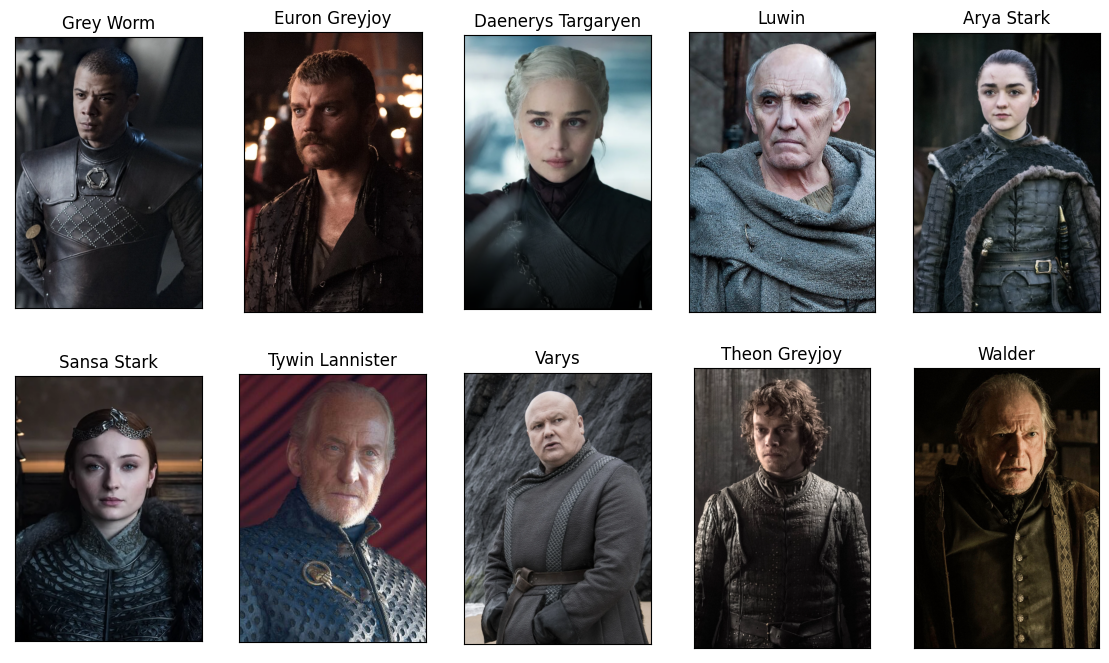

In [0]:
print_photos_rfr()

From the list above, we can see that most of these characters have a few things in common. Characters such as Grey Worm, Euron Greyjoy, Daenerys Targarygen, Luwin Arya, and Sansa Stark all are main characters in the show. Therefore, 
it's no suprise that these characters have highest feature importance. Furthermore, the characters above are known for killing others in the show, and as we saw earlier from our Feature Contribution chart, number of deaths was one of the feature with the most contribution to the epsiode rating. 

Beside building a model with Random Forest Regressor, we wanted to use another machine learning algorithmn, XGBoost, to build model to get feature importance. XGBoost iterates upon the "many trees" strategy employed in Random Forest and applies leaf weighting. This penalizes features which do not contribute to improving model predictability.

### Feature importance - XGBoost 

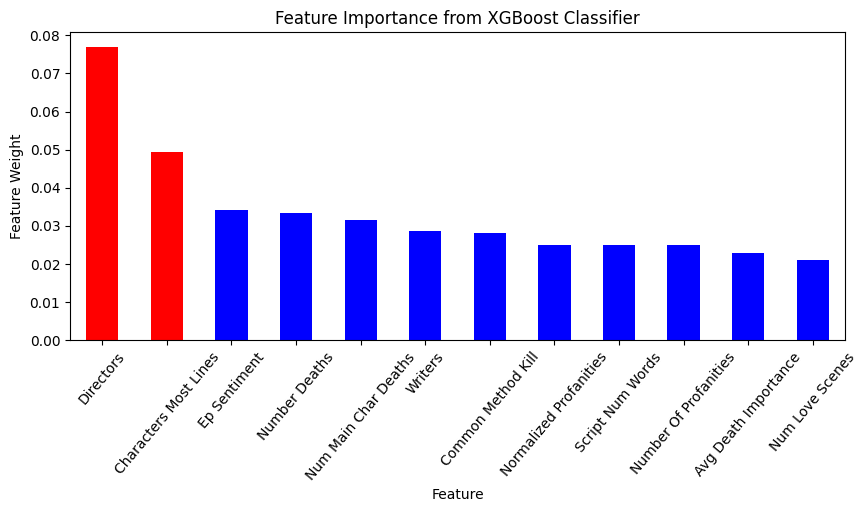

In [0]:
#fit model into training data
xg_model = XGBClassifier()
xg_model.fit(X, Y)

# For one-features, take the max value for each feature as the feature importance
xg_importances = pd.Series(xg_model.feature_importances_, index=X.columns)
xg_df = xg_importances[~xg_importances.index.isin(eda_df.columns)].to_frame().reset_index()
xg_df['column'] = xg_df.apply(lambda row: row['index'].split('_',1)[1],axis=1)
xg_ohe = xg_df.groupby('column')[0].apply(np.max).to_frame()
xg_imp = xg_importances[xg_importances.index.isin(eda_df.columns)].to_frame()
xg_feat_importances = pd.concat([xg_ohe,xg_imp]).sort_values(0,ascending=False)

#Creating a horizontal bar plot showing feature importances
fig = xg_feat_importances.plot(kind='bar',color='rrbbbbbbbbbb')
plt.title("Feature Importance from XGBoost Classifier")
plt.xlabel("Feature")
plt.ylabel("Feature Weight")
xg_xtick_labels = [col.replace('_',' ').title() for col in xg_feat_importances.index]
fig.set_xticklabels(xg_xtick_labels)
fig.tick_params(axis='x', rotation=50)
fig.get_legend().remove();

With XGBoost, it appears that directors, characters most lines, episode sentiment, and number of deaths are among the feature with that highest importance in episode rating. This result agrees with our Random Forest Model we saw earlier with characters most lines, directors, and numbers deaths being the top four feature importance. However, XGBoost model shows that episode sentiment is the third most important feature but Random Forest model did not. 

In [0]:
# Get Most important characters XGB
xg_chars = xg_df[xg_df.column == 'characters_most_lines'].sort_values(0,ascending=False).reset_index(drop=True)
xg_chars = xg_chars['index'].apply(lambda x: x.split('_',1)[0].title())
xg_chars = xg_chars[~xg_chars.isin(['Soldier','Man'])].values[:10]

# Character Photots
def print_photos_xg():
  theon = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/7/78/TheonS8E1.PNG/revision/latest?cb=20190415192721')
  margaery = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/b/b5/Margaery_Tyrell_S6.png/revision/latest?cb=20160729224605')
  arya = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/b/be/AryaShipIronThrone.PNG/revision/latest?cb=20190520174300')
  eddard = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/3/34/Eddard_Stark.jpg/revision/latest?cb=20190701140812')
  varys = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/f/ff/Varys8x05Dragonstone.PNG/revision/latest?cb=20190513041715')
  jon = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/d/d0/JonSnow8x06.PNG/revision/latest?cb=20190714094440')
  sansa = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/6/63/QueenSansa.PNG/revision/latest?cb=20190520085809')
  jamie = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/b/b8/Jaime_S8_redemption_infobox.png/revision/latest?cb=20190906020647')
  rob = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/5/50/S3E9_Robb_Stark_main.jpg/revision/latest?cb=20160718071203')
  denerys = io.imread('https://vignette.wikia.nocookie.net/gameofthrones/images/e/ee/QueenDaenerysTargaryenIronThrone.PNG/revision/latest?cb=20190520173137')


  pic_list = [margaery,theon,eddard,varys,arya,rob,jon,jamie,sansa,denerys]

  fig, ax = plt.subplots(2,5,figsize=(14, 8))
  axes = ax.flatten()
  for char, a,pic in zip(xg_chars, axes, pic_list):
    a.imshow(pic)
    a.axes.xaxis.set_ticks([])
    a.axes.yaxis.set_ticks([])
    a.set_title(char, color='black') 

**Characters with Highest Feature Importance From XGBoost Classifier Model**

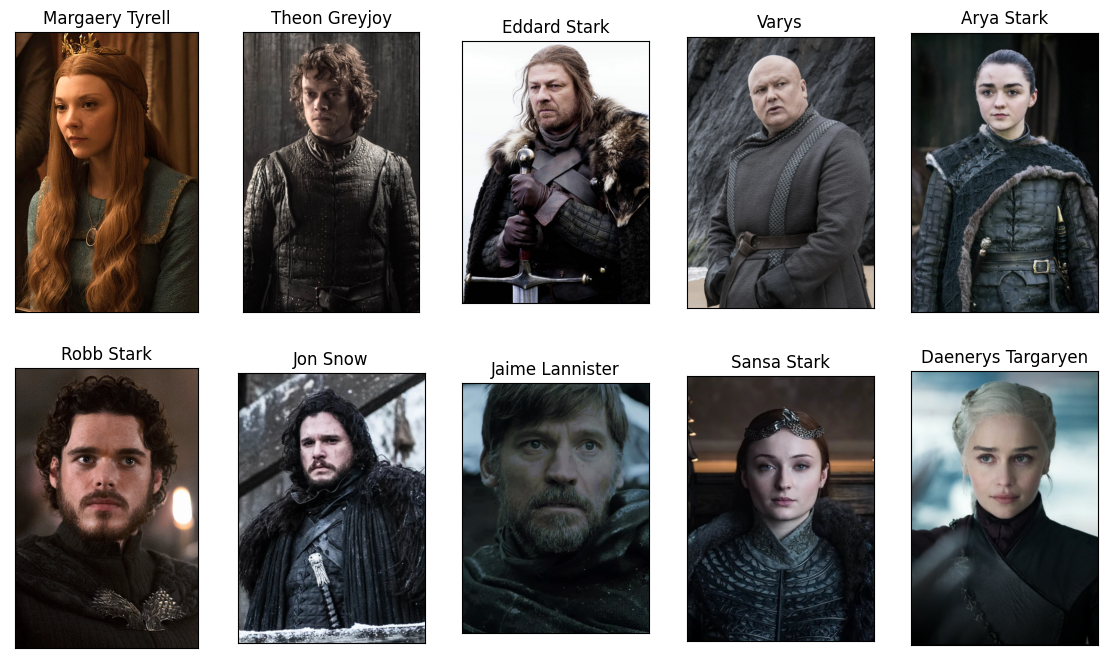

In [0]:
print_photos_xg()

Again from the list above shows that these characters have the highest feature importance. Similar to Random Forest model, most of these characters are main characters in the show. However, characters such as Eddard Stark and Jaime Lannister are not main characters in the show but they have killed a lot of people in the show. Therefore it makes sense that they contribute to the epsiode rating. 

# Ethics & Privacy

Our team acknowledges the issues related to the unethical use of data. Personal data can endanger the privacy of individuals. Our primary data source is Kaggle, and is presented to users in an open-source format. Our team also scraped data from wikipedia and the washington post. Both of these scraping efforts were conducted solely on articles about Game of Thrones, a fictional show, and do not contain data on users of wikipedia or contributors to the Washington Post. Our data contains solely data about a fictional TV show which can be streamed on HBO. 
 
Because our data is about a fictional TV series, there are no issues in equitable analysis. Additionally, since our data is comprised of the entire script of each episode, there is no way our data can be excluding any characters or populations. 

# Conclusion & Discussion

In our project, we determined which underlying attributes of Game of Thrones episodes helped predict the episode's success, which is measured by average audience rating. The data we used was created by using pre-exisiting datasets and webscraping. Our finalized dataset contained the following attributes:  
- script
- plot
- writers
- directors
- script
- script_num_words
- ep_sentiment
- top_tfidf_words
- number_of_profanities
- characters_most_lines
- number_deaths
- avg_death_importance
- num_main_char_deathsc
- common_method_kill
- num_love_scenes
- rating

These features were chosen as they quanitfy the various aspects of Game of Thrones episodes in a manner than could be used in the chosen machine learning algorithms to determine feature importance. After researching the show's viewership, we hypothesized that the appearance of certain characters, the amount of violence in the episode, and the number of words in the episode's script are important factors that influence the episode's rating.

After completing our research process, outlined and described above, we have reached the following conclusions in regards to our research question. Firstly, as a result of our RandomForest Feature Analysis, we found that Character Presence, Episode Sentiment, and Total Words in Episode Script were the most impactful features to episode ratings. Secondly, the XGBoost Feature Analysis found that the Director, Character Presence, and Episode Sentiment were the most impactful to episode ratings. 

Our research can therefore conclude that **Character Presence** (defined by the number of lines per character) and **Episode Sentiment** (defined with a sentiment analysis) are the most critical features to an episode's rating. From our random forest model, we found that Grey Worm, Euron Greyjoy and Daenerys Targaryen are the three most important characters. Our XGBoost model indicated that the three most important characters are Margaery Tyrell, Theon Greyjoy and Eddard Stark. To us, this makes sense. Game of Thrones is a TV Series known for its ability to thoroughly develop characters and create audience emotional attachment to those characters. This attachment is also felt in the total sentiment of each episode. 

It is clear, the ability to create emotional attachment to the characters within and the sentiment of each episode is one of Game of Thrones' most prominent strengths and has a significant impact on episode rating.

# Team Contributions

- <b>Jared Andrews</b>: Helped develop research question;  Wrote code for data collection and cleaning;  Wrote "Datasets", "Setup", "Additional Data Ingestion and Data Cleaning" and "Conclusion and Discussion" portions of the final report; Helped with analysis code
- <b>Pedro Enciso</b>: Worked on the overview and background/prior work sections. Assisted with analysis.
- <b>Sieng Ly</b>: Worked on the background and analysis section. Helped with research question.
- <b>Erik Mumm</b>:  Worked primarily on the EDA Section of the Analysis. Assisted with team development of research question and analysis. Also assisted in writing the "Conclusion and Discussion"